## Importing necessary libraries and data

In [23]:

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA
df = pd.read_csv("stock_data.csv")

## Data Overview

- Observations
- Sanity checks

In [24]:
df.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

In [25]:
df.shape

(340, 15)

we have 340 rows and 15 columns

In [26]:
df.columns = [col.replace(" ", "_") for col in df.columns]#Let clean columns names

In [27]:
df.rename(columns={"Security": "Company"},inplace= True)#rename of column Security to Company

In [28]:
df.duplicated().sum()

0

There is no duplicated values

In [29]:
df.isnull().sum()

Ticker_Symbol                   0
Company                         0
GICS_Sector                     0
GICS_Sub_Industry               0
Current_Price                   0
Price_Change                    0
Volatility                      0
ROE                             0
Cash_Ratio                      0
Net_Cash_Flow                   0
Net_Income                      0
Earnings_Per_Share              0
Estimated_Shares_Outstanding    0
P/E_Ratio                       0
P/B_Ratio                       0
dtype: int64

The data have no missing values

In [30]:
df.info()#checking the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker_Symbol                 340 non-null    object 
 1   Company                       340 non-null    object 
 2   GICS_Sector                   340 non-null    object 
 3   GICS_Sub_Industry             340 non-null    object 
 4   Current_Price                 340 non-null    float64
 5   Price_Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash_Ratio                    340 non-null    int64  
 9   Net_Cash_Flow                 340 non-null    int64  
 10  Net_Income                    340 non-null    int64  
 11  Earnings_Per_Share            340 non-null    float64
 12  Estimated_Shares_Outstanding  340 non-null    float64
 13  P/E_R

4 columns are objects
7 columns are float and others are integer

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

# Univariate Data Analysis

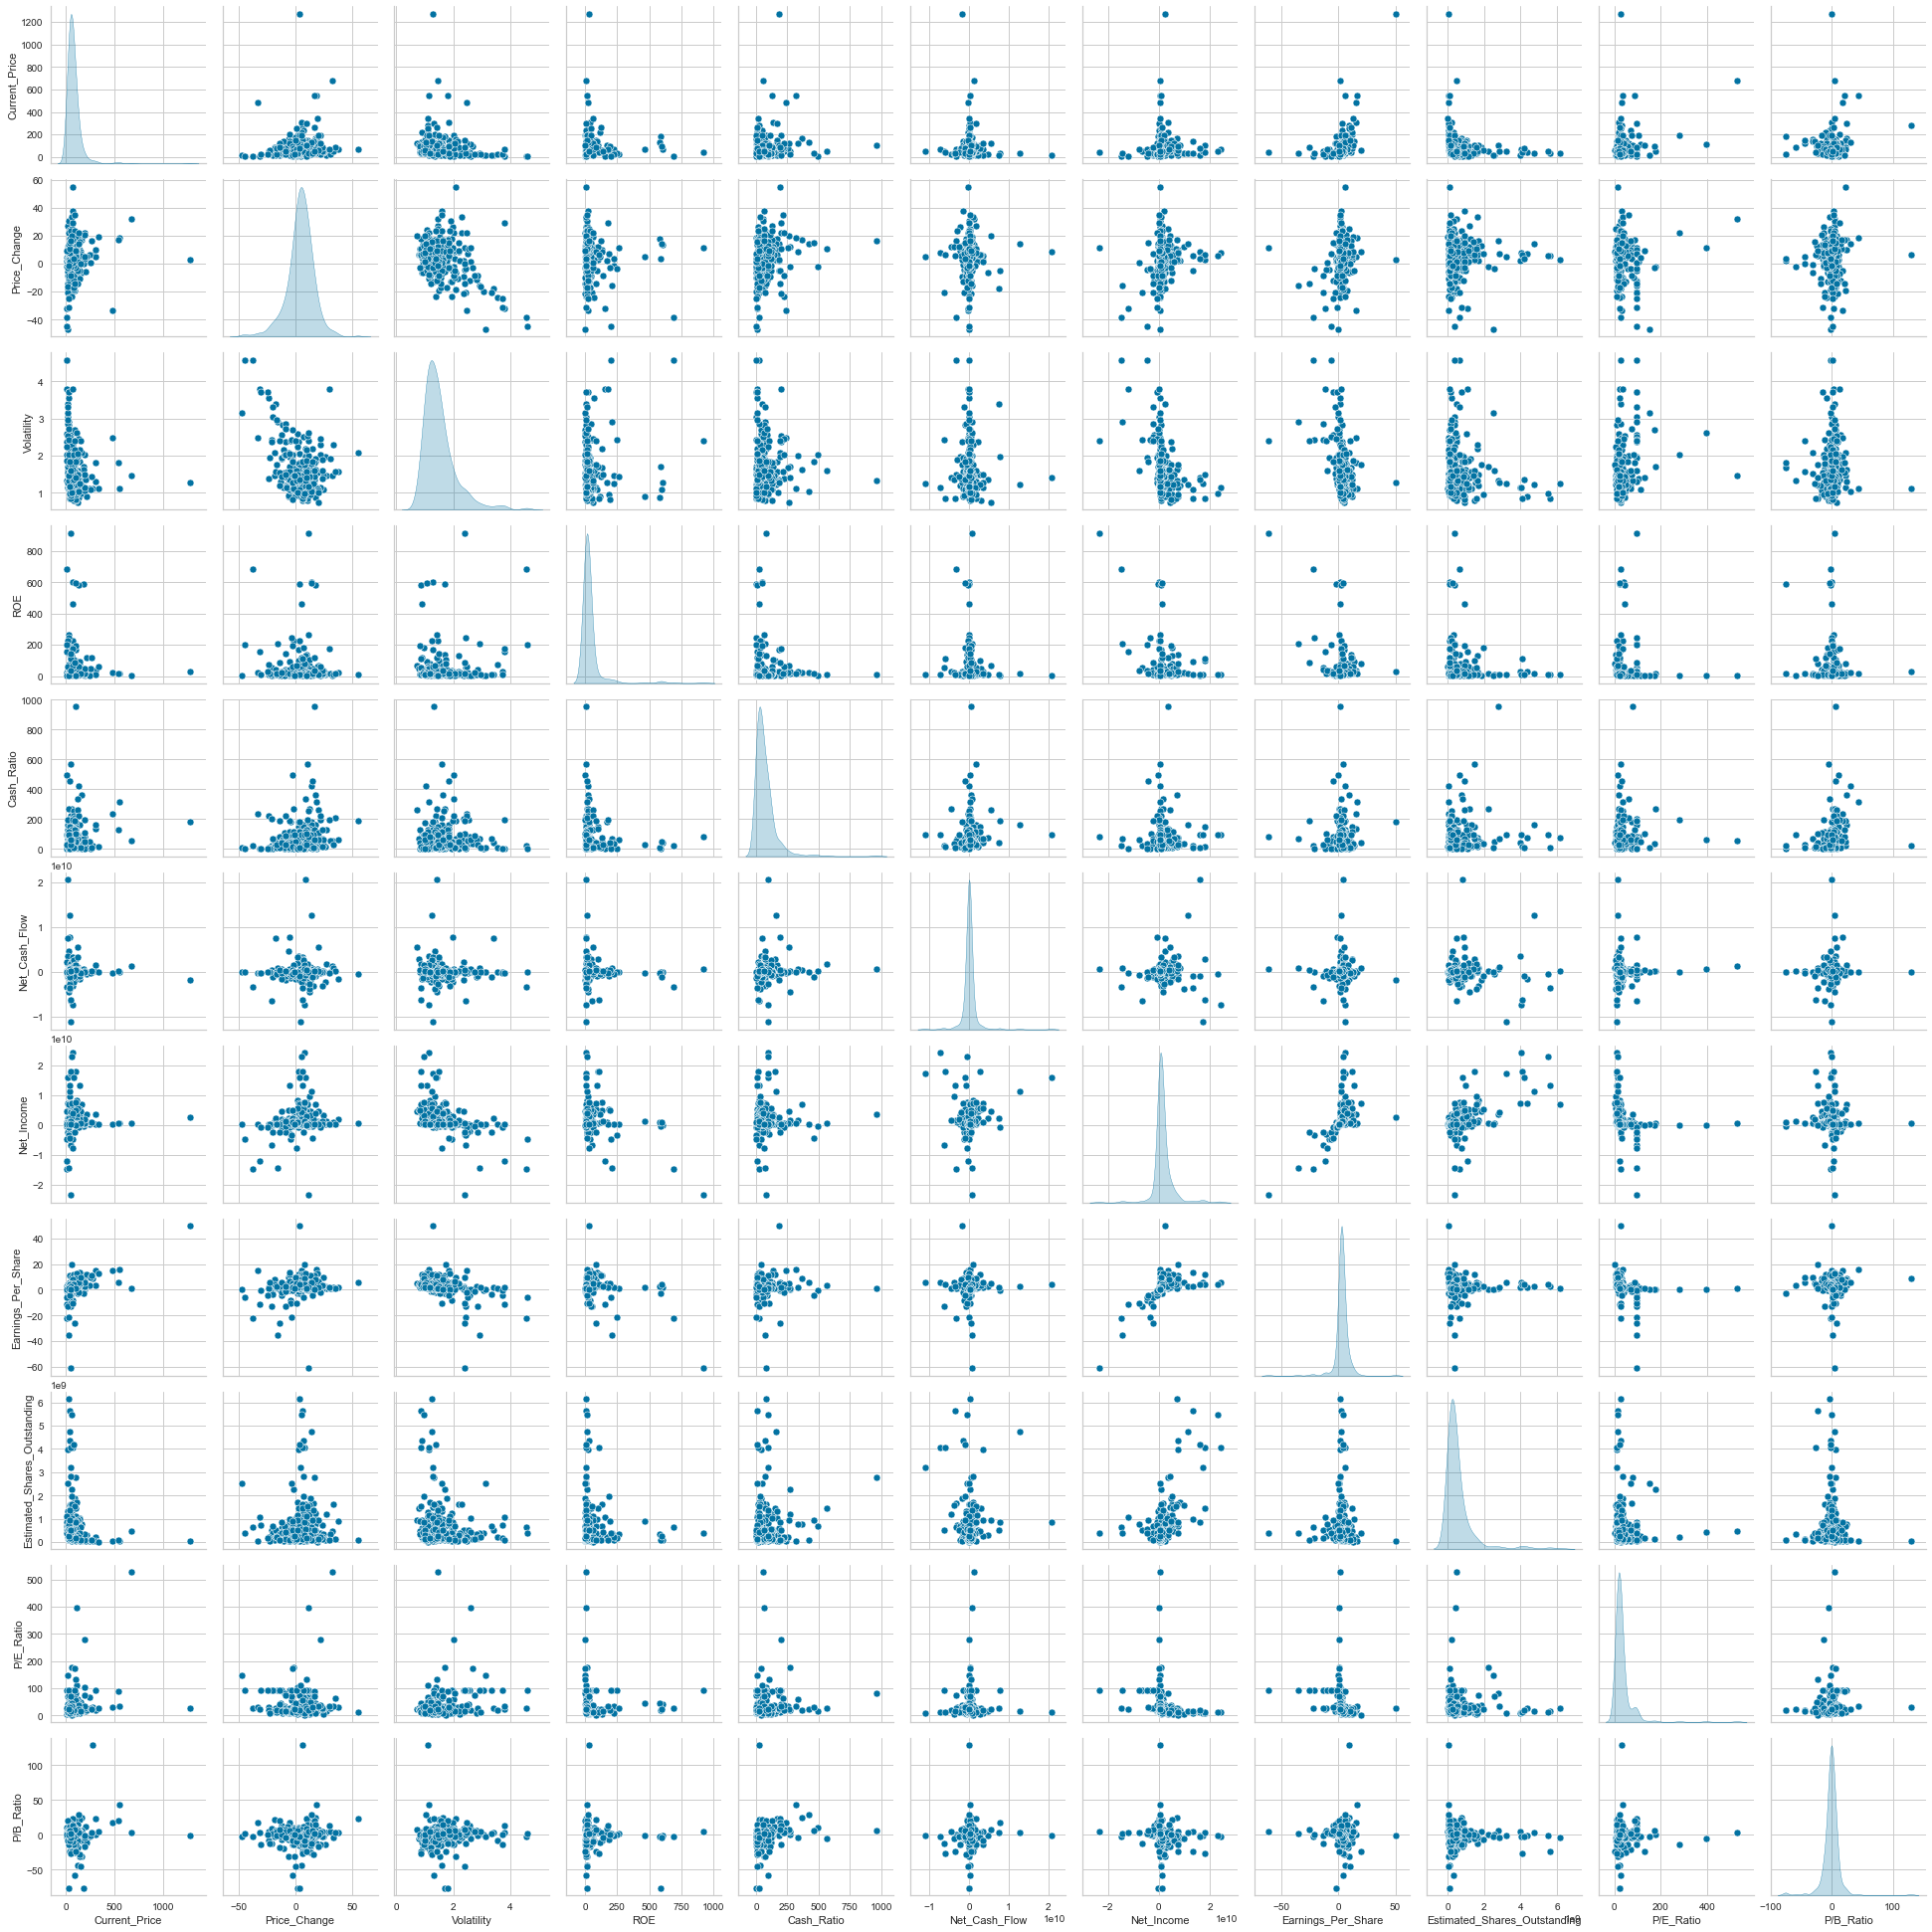

In [9]:
sns.pairplot(df, diag_kind='kde') ;

In [195]:
df['GICS_Sector'].value_counts()#tack a look at 'GICS_Sector' variable

Industrials                    53
Financials                     49
Health Care                    40
Consumer Discretionary         40
Information Technology         33
Energy                         30
Real Estate                    27
Utilities                      24
Materials                      20
Consumer Staples               19
Telecommunications Services     5
Name: GICS_Sector, dtype: int64

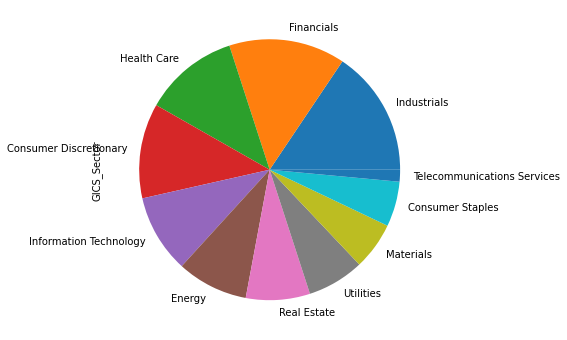

In [16]:
plt.figure(figsize=(10,6))
df['GICS_Sector'].value_counts().plot(kind='pie');

industrials and financial are on the top of The specific economic sector

In [11]:
df['GICS_Sub_Industry'].value_counts()
# as you can see 'Oil & Gas Exploration & Production' , 'Industrial Conglomerates', 'REITs' are top tree sub-industry group

Oil & Gas Exploration & Production                 16
Industrial Conglomerates                           14
REITs                                              14
Internet Software & Services                       12
Electric Utilities                                 12
MultiUtilities                                     11
Health Care Equipment                              11
Banks                                              10
Property & Casualty Insurance                       8
Biotechnology                                       7
Diversified Financial Services                      7
Semiconductors                                      6
Oil & Gas Refining & Marketing & Transportation     6
Pharmaceuticals                                     6
Packaged Foods & Meats                              6
Managed Health Care                                 5
Diversified Chemicals                               5
Consumer Finance                                    5
Airlines                    

# Question 
### What does the distribution of stock prices look like?

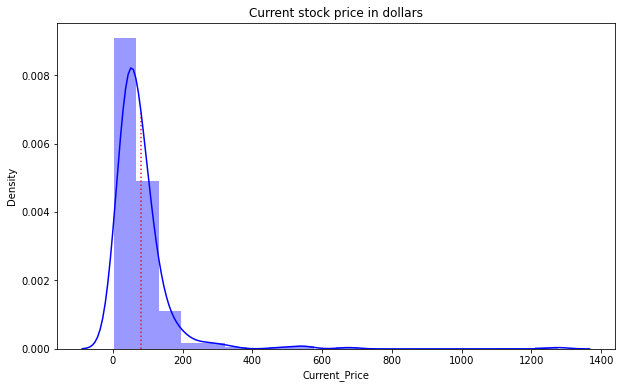

In [18]:
plt.figure(figsize=(10,6))
axx=sns.distplot(df['Current_Price'],color="b",bins=20)
mean = df['Current_Price'].mean()
kdeline = axx.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)
axx.vlines(mean, 0, height, color='crimson', ls=':')
plt.title("Current stock price in dollars");

Current stock price has normal distribution  but is highly skewed to the right. its mean is around 90$

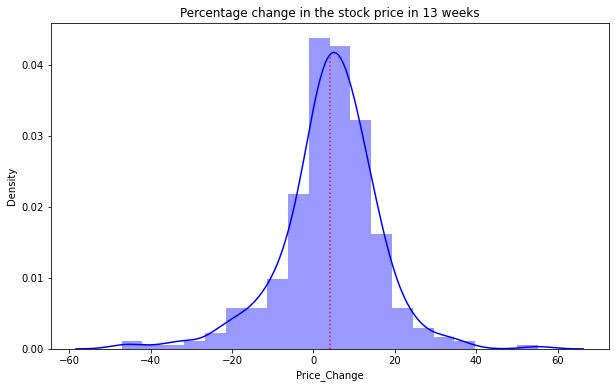

In [19]:
plt.figure(figsize=(10,6))
axx=sns.distplot(df['Price_Change'],color="b",bins=20)
mean = df['Price_Change'].mean()
kdeline = axx.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)
axx.vlines(mean, 0, height, color='crimson', ls=':')
plt.title("Percentage change in the stock price in 13 weeks");

the Percentage change in the stock price in 13 weeks has a normal distribution and mean around 5

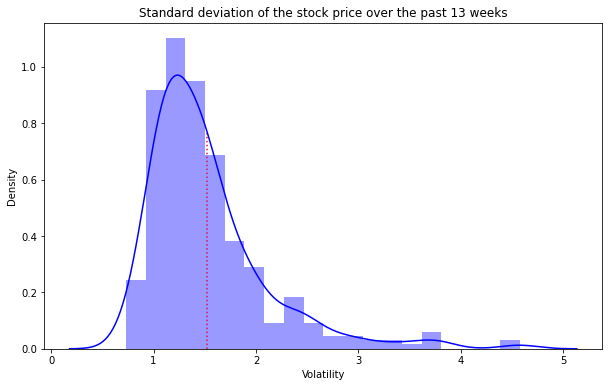

In [20]:
plt.figure(figsize=(10,6))
axx=sns.distplot(df['Volatility'],color="b",bins=20)
mean = df['Volatility'].mean()
kdeline = axx.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)
axx.vlines(mean, 0, height, color='crimson', ls=':')
plt.title("Standard deviation of the stock price over the past 13 weeks");

 Standard deviation of the stock price over the past 13 weeks has a mean of around 1.6 and is skewed to the right.

In [21]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create a boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this helps us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

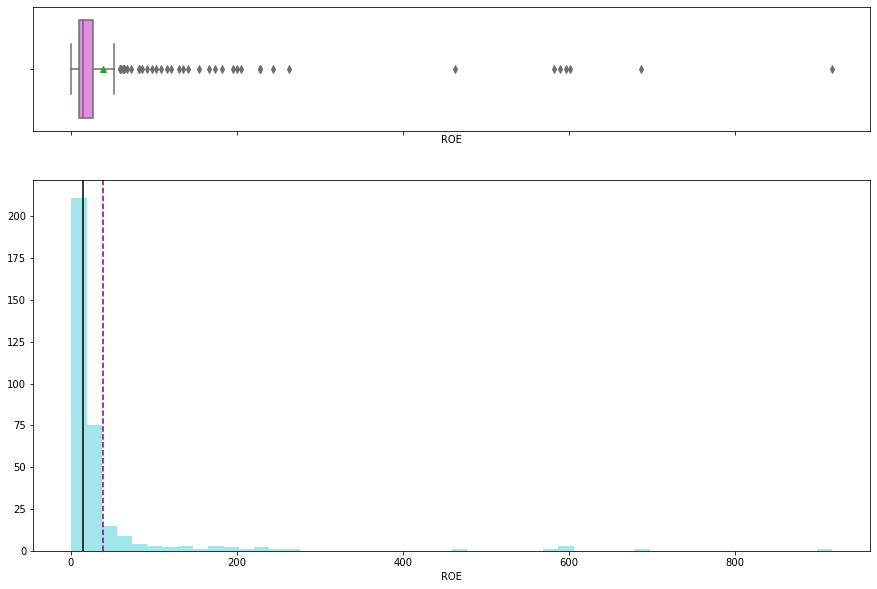

In [22]:
histogram_boxplot(df['ROE'])

we can see its destribution is highly skewed to the right and have outliers

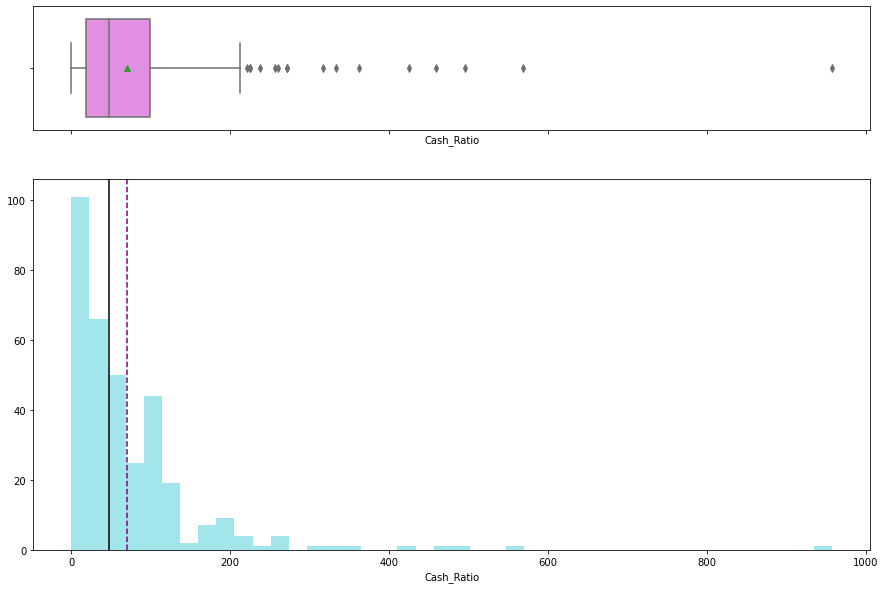

In [23]:
histogram_boxplot(df['Cash_Ratio'])

the same results for Cash Ratio 

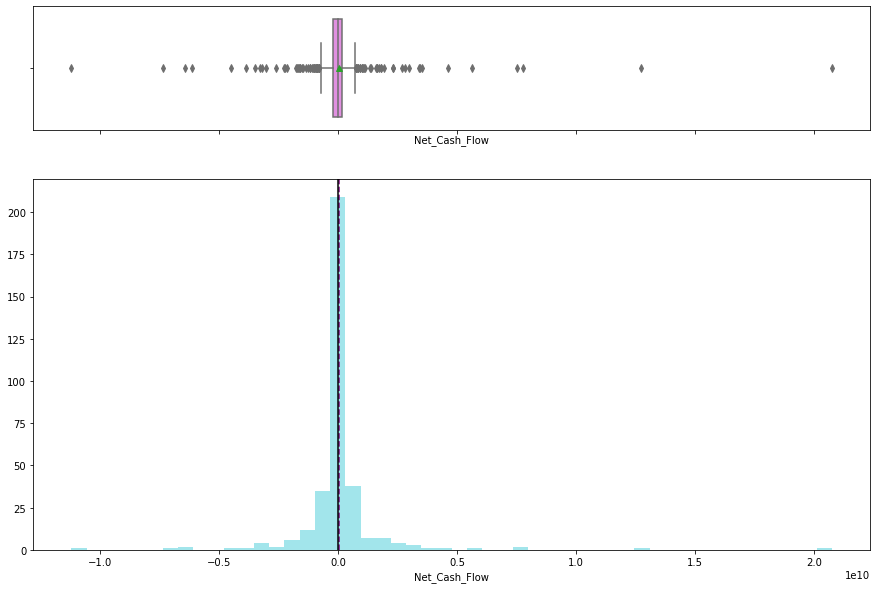

In [24]:
histogram_boxplot(df['Net_Cash_Flow'])

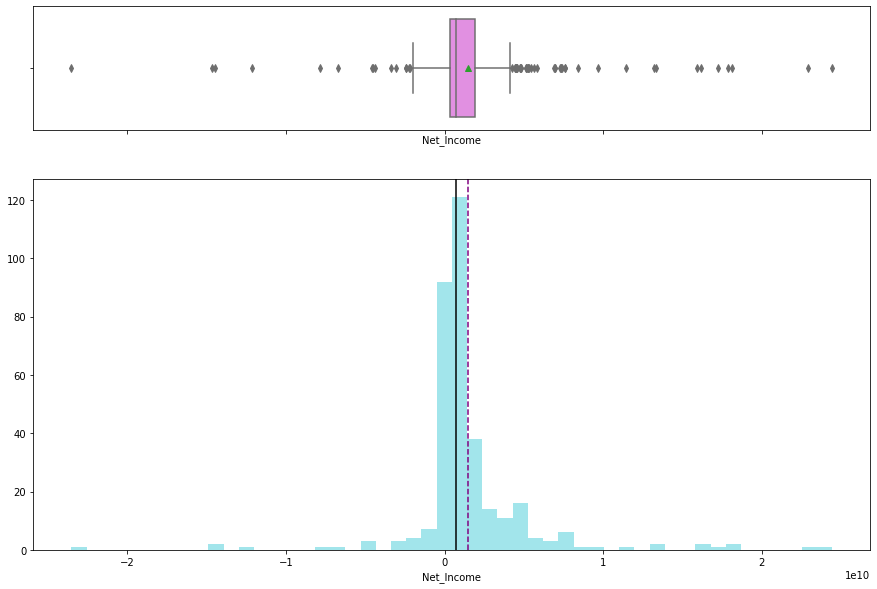

In [25]:
histogram_boxplot(df['Net_Income'])

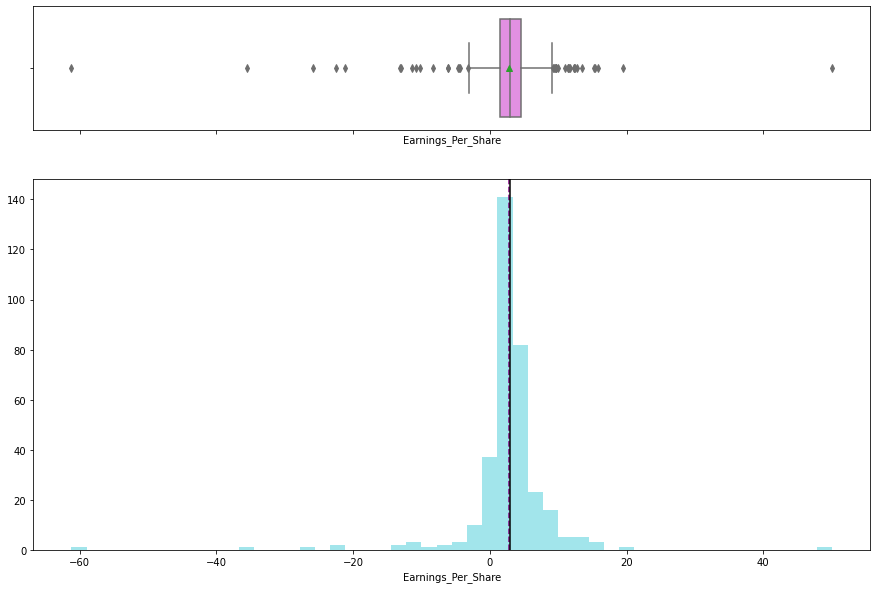

In [26]:
histogram_boxplot(df['Earnings_Per_Share'])

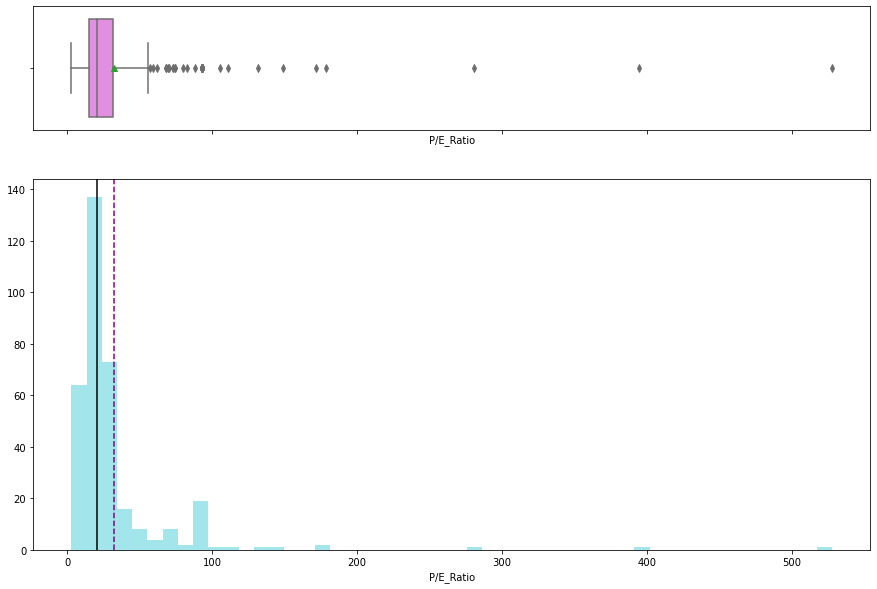

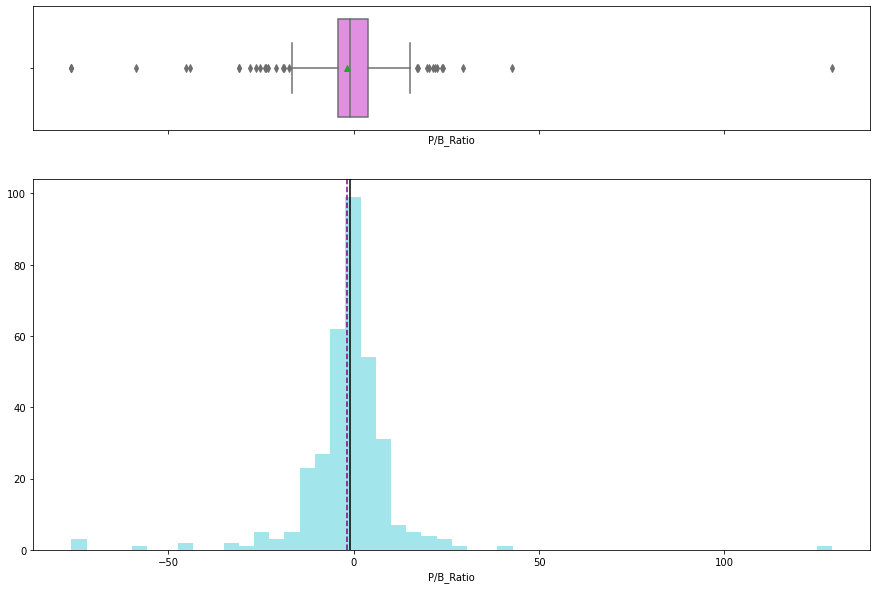

In [97]:
histogram_boxplot(df['P/E_Ratio'])
histogram_boxplot(df['P/B_Ratio'])

Almost all variables have skewed distribution and also outliers.

## Multivariate Data Analysis

# Question 
### How are the different variables correlated with each other

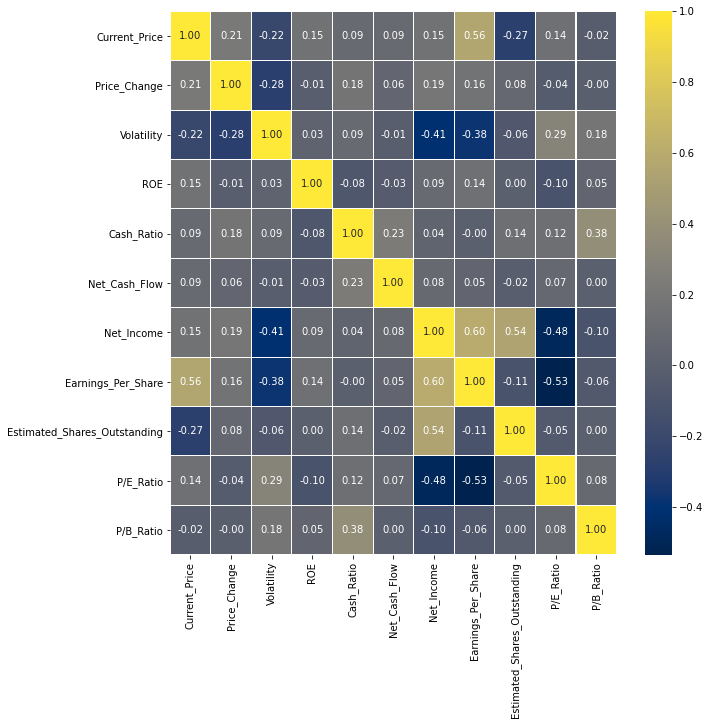

In [177]:
fig,ax = plt.subplots(figsize=(10,10))   
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="cividis") 
plt.show()

-it seems that some variables have a correlation 
* for example, between Price_Change and Volatility, there is a significant negative correlation(-0.41)
* Also, Net_Income has a strong positive correlation with Estimated_Shares_Outstanding and Earnings_per_Share(0.59 & 0.56)
* Earnings_per_Share has positive correlatin with Current_Price (0.48) and also has negative coorelation with REO and Volatility variables(-0.4 & -0.38).



# Question 
### The stocks of which economic sector have seen the maximum price increase on average?

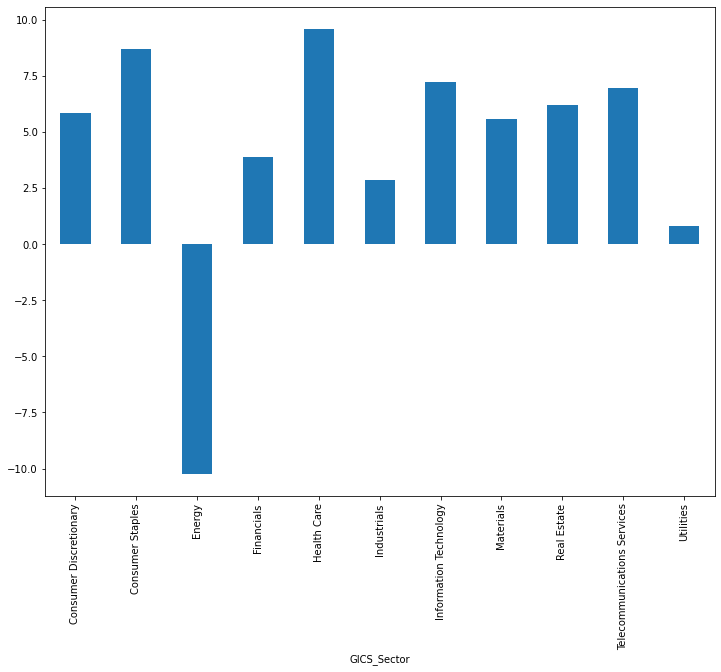

In [51]:
plt.figure(figsize=(12,9))
df.groupby('GICS_Sector')['Price_Change'].mean().plot.bar();


Health Care have seen the maximum price increase on average

# Question 
### Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

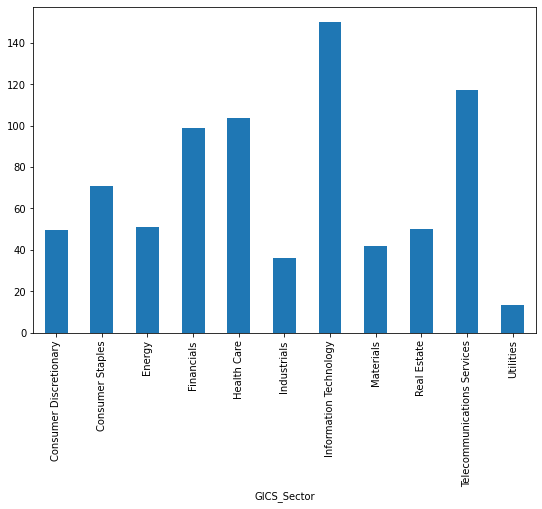

In [42]:
plt.figure(figsize=(9,6))

df.groupby('GICS_Sector')['Cash_Ratio'].mean().plot.bar();

The average Cash ratio in economic sectors of Information Technology, Telecommunication Services, Healthcare, and Financials are higher than the others; also in Utilities section is the lowest.

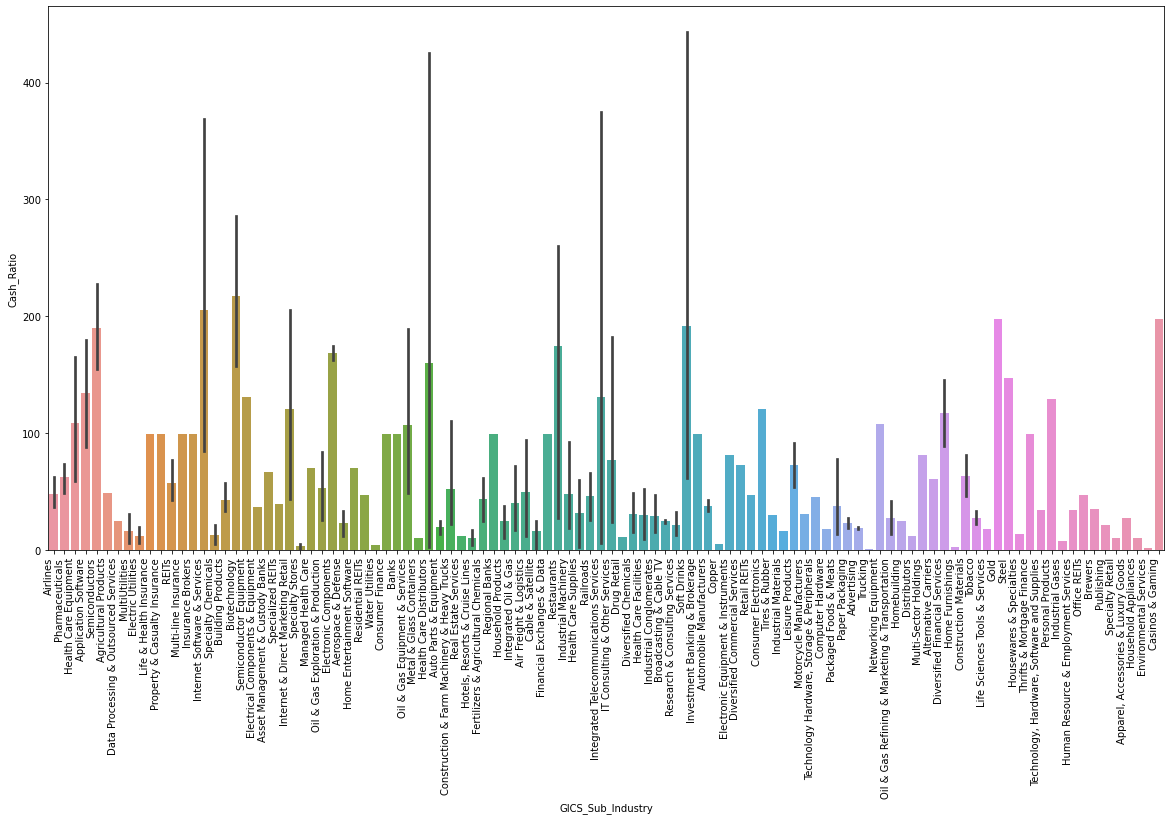

In [112]:
plt.figure(figsize=(20,10))
chart=sns.barplot(data = df, x='GICS_Sub_Industry',y='Cash_Ratio')
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=90, 
    horizontalalignment='right',
    fontweight='light');

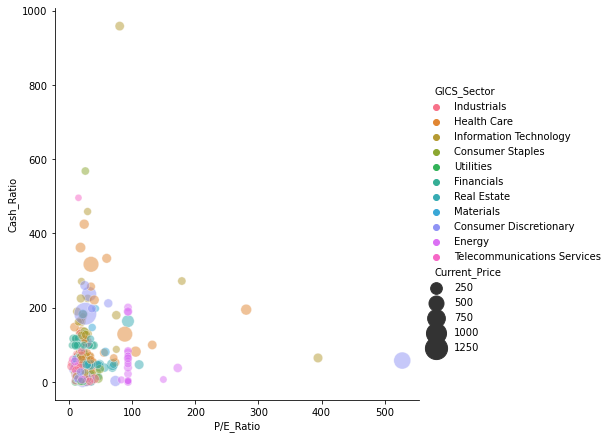

In [55]:
sns.relplot(data = df, x='P/E_Ratio', y='Cash_Ratio', hue='GICS_Sector',size='Current_Price',sizes= (50,500), 
            alpha= 0.5, palette="husl",height= 6 );


the companies with high P/E_Retio have lower Cash_Ratio also Current stock price of Consumer Discretionary and Health care sections is higher than the others.

# Question
### P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

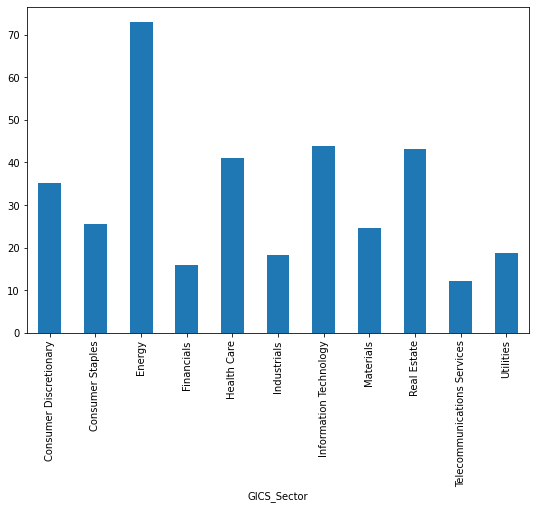

In [43]:
plt.figure(figsize=(9,6))

df.groupby('GICS_Sector')['P/E_Ratio'].mean().plot.bar();

the relative value of company's shares in Energy, Information Technology, Real estate, and Healthcare are higher than the others

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [31]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

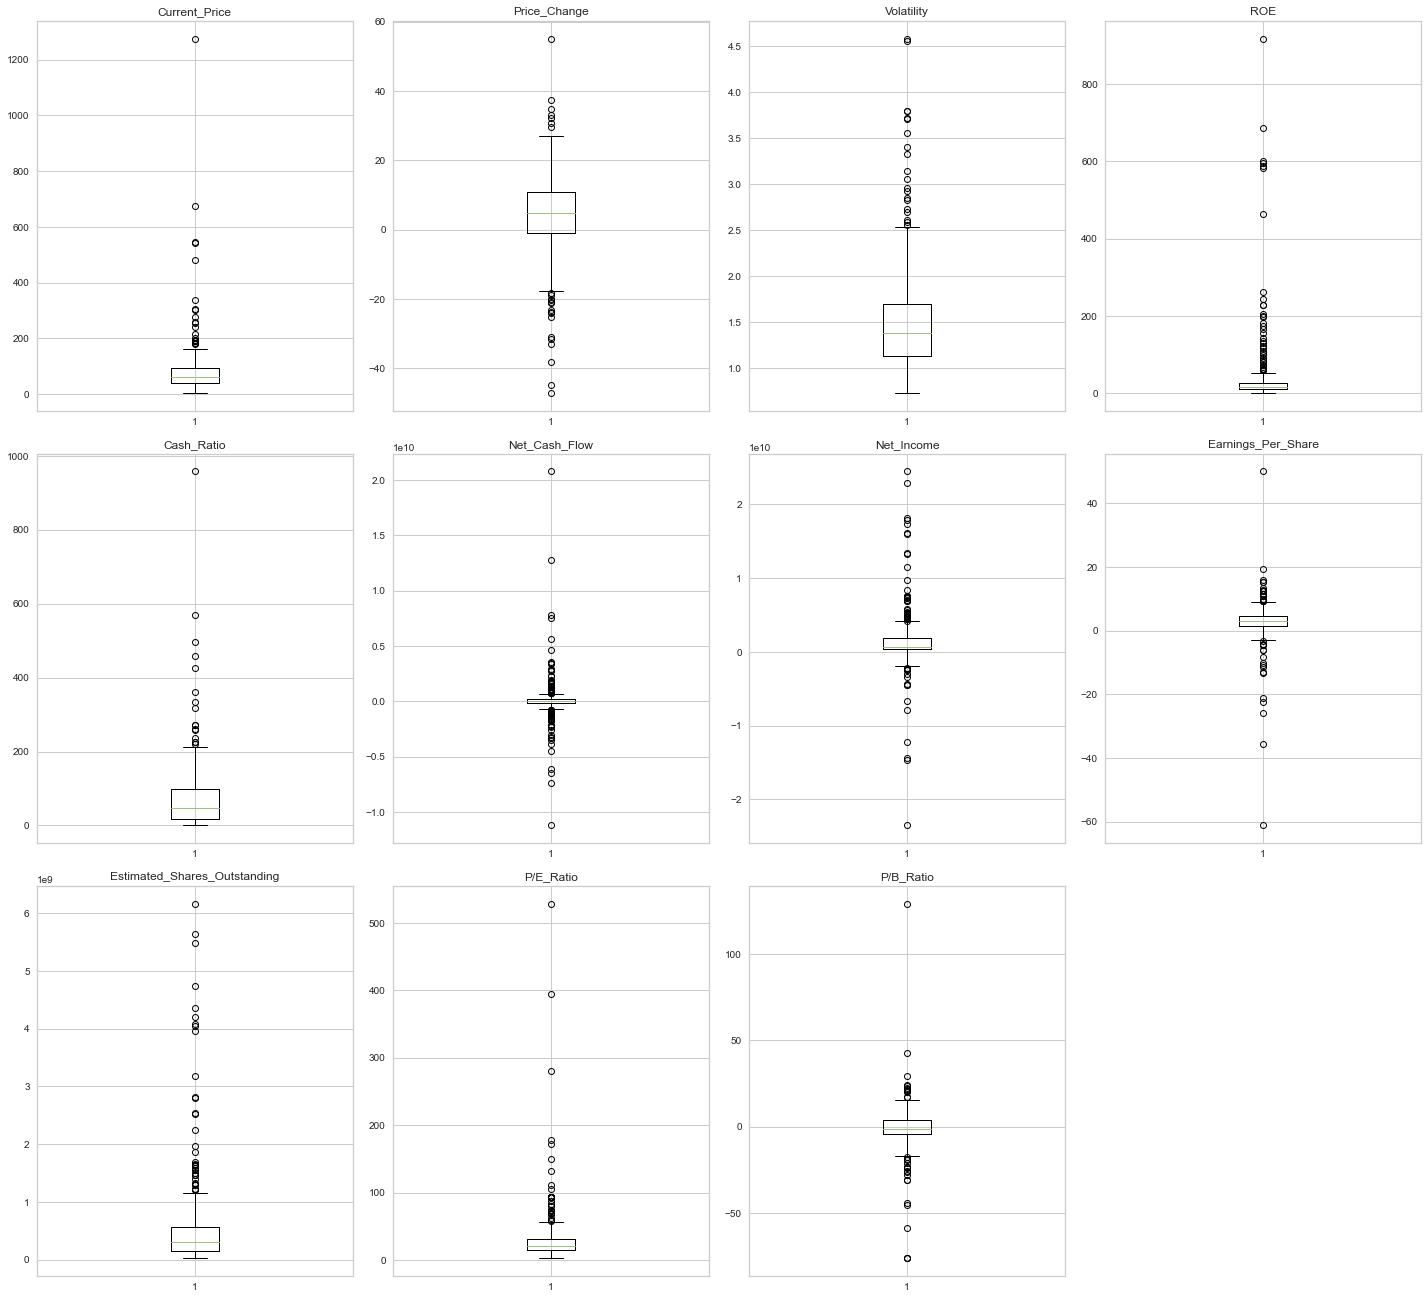

In [13]:
#Outlier check
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [32]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
            df = treat_outliers(df, c)

    return df

In [33]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)

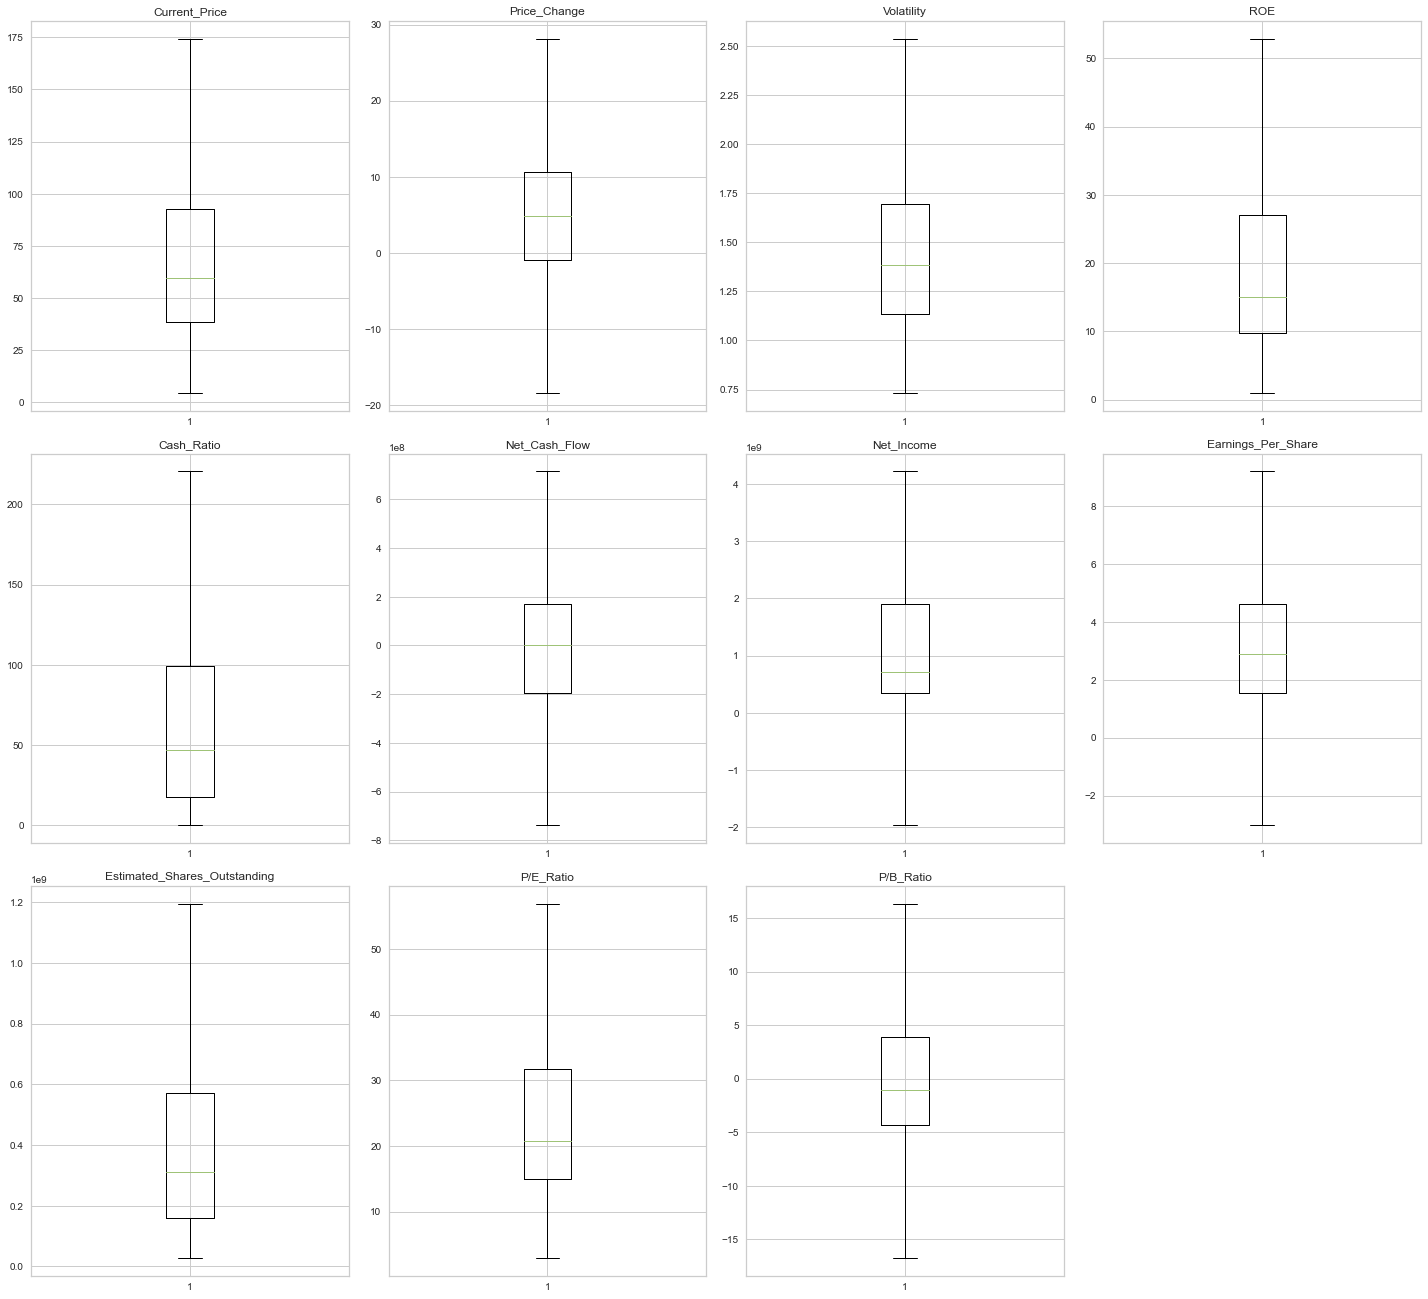

In [34]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

# data scaling

In [35]:
#create a list of nomerical columns
numerical_col = df.select_dtypes(include=np.number).columns.tolist()

In [36]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = df[numerical_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [37]:
# creating a dataframe of the scaled columns
scaled_df1 = pd.DataFrame(subset_scaled, columns=subset.columns)

In [38]:
scaled_df1.head()

Current_Price  Price_Change  Volatility       ROE  Cash_Ratio  \
0      -0.650712      0.549287    0.448212  2.116831   -0.207311   
1      -0.257962      0.387909    1.568844  2.116831    0.238584   
2      -0.591183      0.675734   -0.459081  0.031532    0.067086   
3       0.548932      0.935802   -0.274700 -0.753522    2.005016   
4      -0.349115     -0.600175    0.478969 -0.426416    2.699583   

   Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
0      -1.433763    1.977138            2.114902   
1       0.133007    1.977138            0.017981   
2       1.722229    1.977138           -0.054640   
3      -0.565079   -0.371735           -0.635605   
4       0.764786   -0.327678           -0.964127   

   Estimated_Shares_Outstanding  P/E_Ratio  P/B_Ratio  
0                      0.645054  -1.493768  -0.997339  
1                      2.124799  -0.462139  -0.992836  
2                      2.124799  -0.703554   0.108970  
3                      0.171420   2.138684   0.714710  
4                      2.124799   2.138684   0.300691

## EDA

- It is a good idea to explore the data once again after manipulating it.

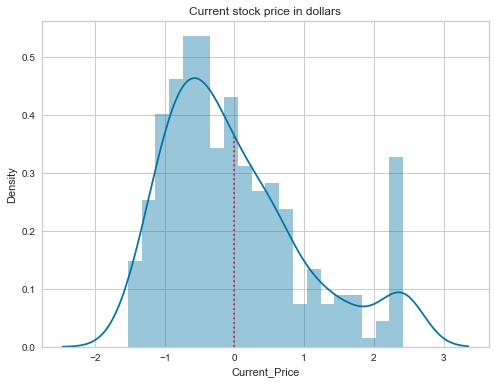

In [39]:
plt.figure(figsize=(8,6))
axx=sns.distplot(scaled_df1['Current_Price'],color="b",bins=20)
mean = scaled_df1['Current_Price'].mean()
kdeline = axx.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)
axx.vlines(mean, 0, height, color='crimson', ls=':')
plt.title("Current stock price in dollars");

No outliers in Current_Price variables but still skewed to the right

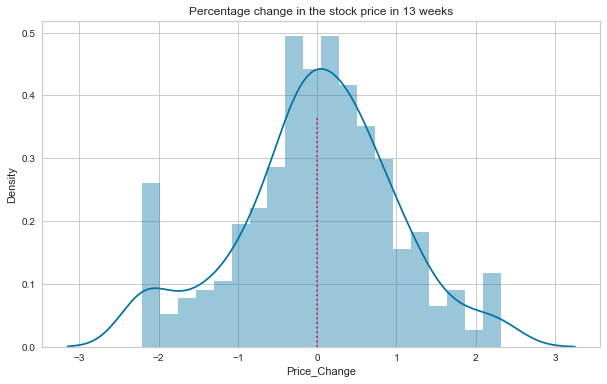

In [19]:
plt.figure(figsize=(10,6))
axx=sns.distplot(scaled_df1['Price_Change'],color="b",bins=20)
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)
axx.vlines(mean, 0, height, color='crimson', ls=':')
plt.title("Percentage change in the stock price in 13 weeks");

look like a normal distribution and less skwedness

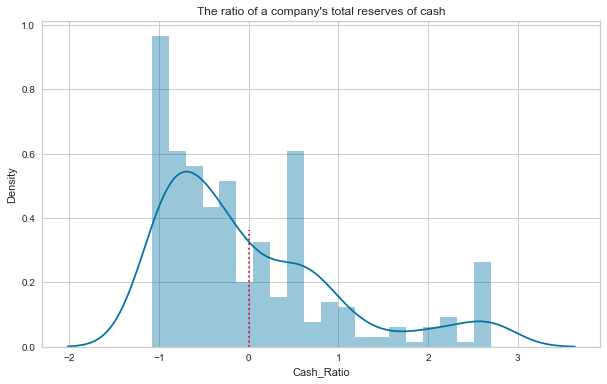

In [20]:
plt.figure(figsize=(10,6))
axx=sns.distplot(scaled_df1['Cash_Ratio'],color="b",bins=20)
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)
axx.vlines(mean, 0, height, color='crimson', ls=':')
plt.title("The ratio of a company's total reserves of cash");

not a normal distribution and skewed to the right

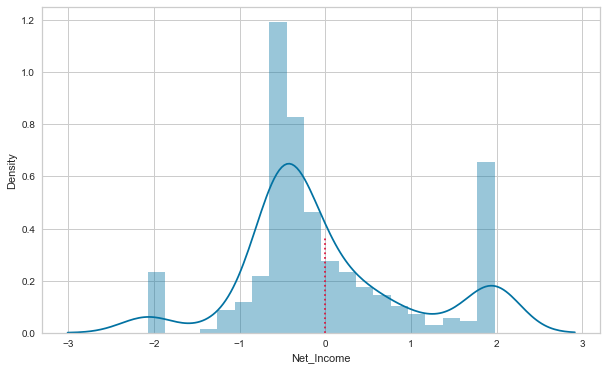

In [21]:
plt.figure(figsize=(10,6))
axx=sns.distplot(scaled_df1['Net_Income'],color="b",bins=20)
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)
axx.vlines(mean, 0, height, color='crimson', ls=':');

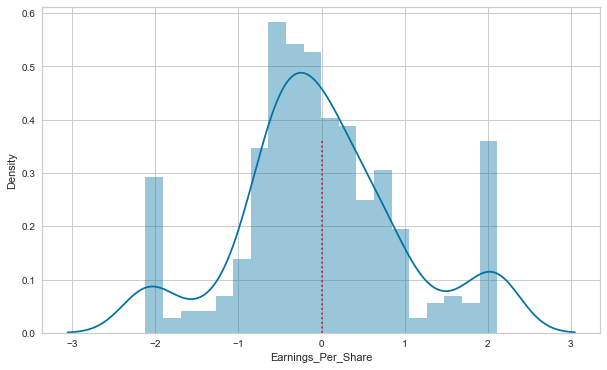

In [22]:
plt.figure(figsize=(10,6))
axx=sns.distplot(scaled_df1['Earnings_Per_Share'],color="b",bins=20)
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)
axx.vlines(mean, 0, height, color='crimson', ls=':');

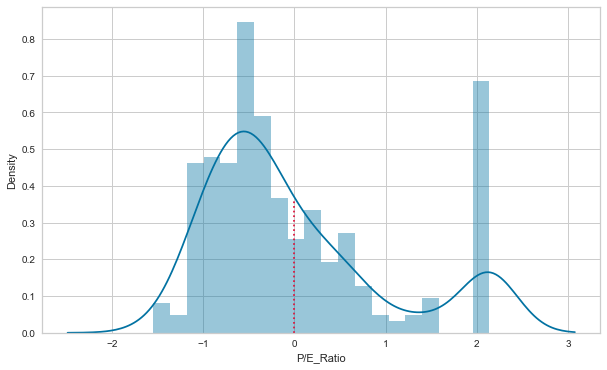

In [23]:
plt.figure(figsize=(10,6))
axx=sns.distplot(scaled_df1['P/E_Ratio'],color="b",bins=20)
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)
axx.vlines(mean, 0, height, color='crimson', ls=':');

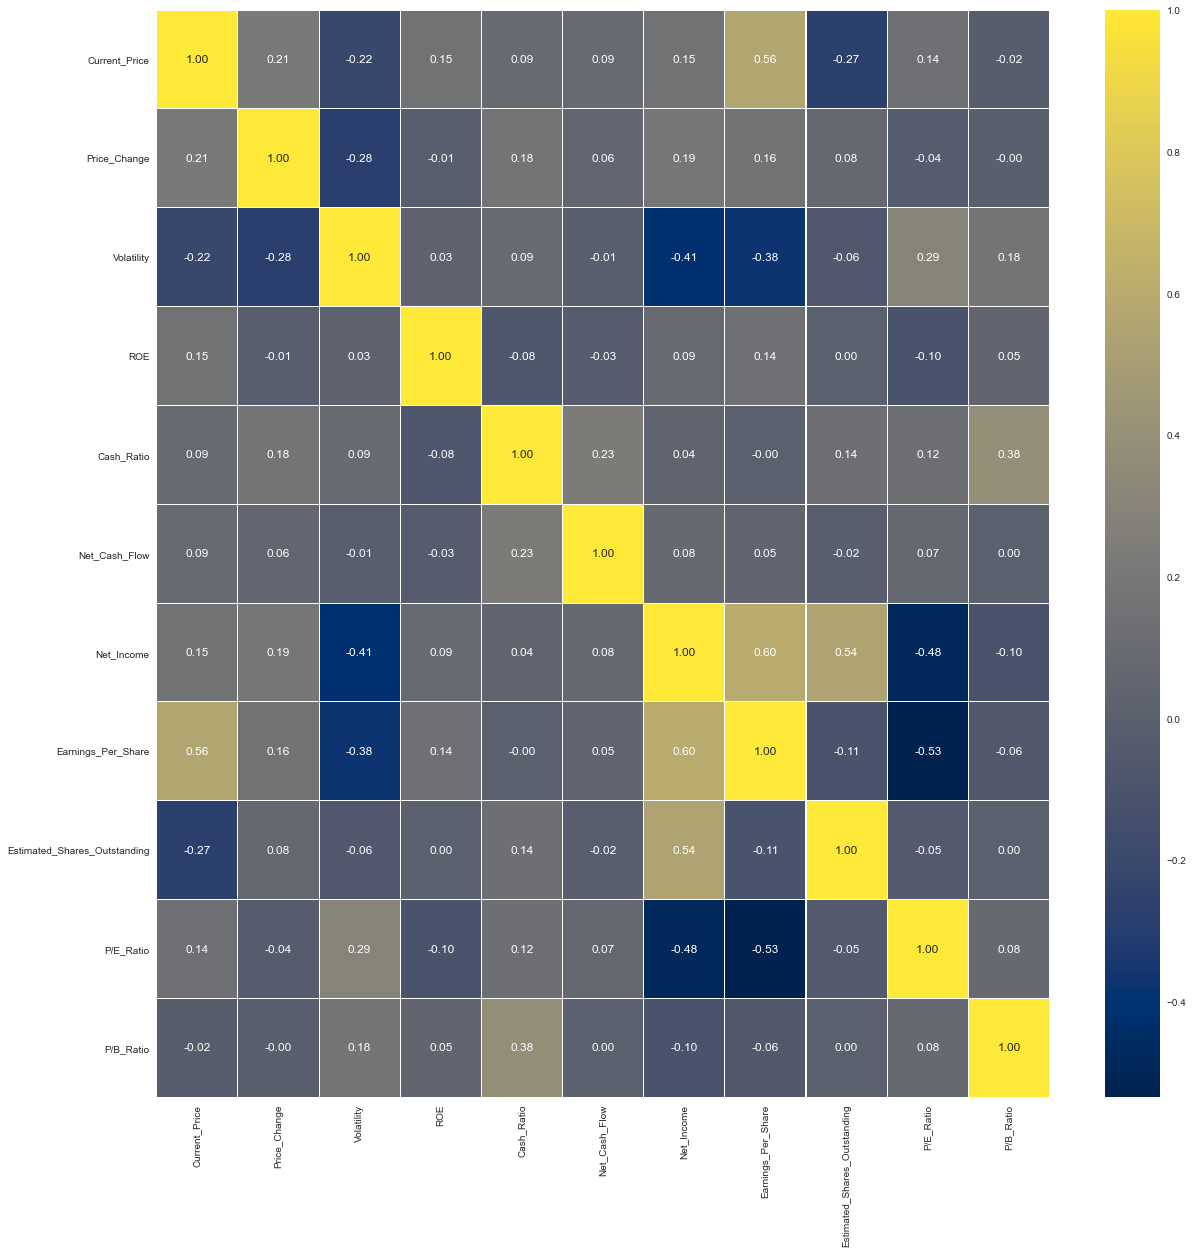

In [24]:
fig,ax = plt.subplots(figsize=(20,20))   
sns.heatmap(scaled_df1.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="cividis") 
plt.show()

it seems some variables have still correlation; for example, Earning_per_share has positive strong correlation with P/E_Ratio

## K-means Clustering

Number of Clusters: 1 	Average Distortion: 3.1482665386211908
Number of Clusters: 2 	Average Distortion: 2.95133394846628
Number of Clusters: 3 	Average Distortion: 2.7587853682733137
Number of Clusters: 4 	Average Distortion: 2.6333554308572875
Number of Clusters: 5 	Average Distortion: 2.5357225475110132
Number of Clusters: 6 	Average Distortion: 2.4575954836683995
Number of Clusters: 7 	Average Distortion: 2.418702726282235
Number of Clusters: 8 	Average Distortion: 2.3518072371567484


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

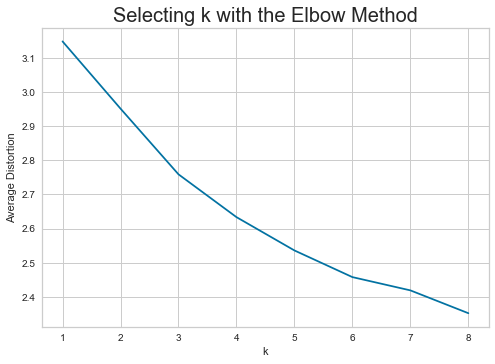

In [40]:

clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state= 110)
    model.fit(scaled_df1)
    prediction = model.predict(scaled_df1)
    distortion = (
        sum(
            np.min(cdist(scaled_df1 , model.cluster_centers_, "euclidean"), axis=1)
        )
        / scaled_df1.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

The appropriate value of k from the elbow curve seems to be 6

**Let's check the silhouette scores.**

For n_clusters = 2, silhouette score is 0.1334867211279908
For n_clusters = 3, silhouette score is 0.18399001347965027
For n_clusters = 4, silhouette score is 0.14051406768408806
For n_clusters = 5, silhouette score is 0.1448302035297134
For n_clusters = 6, silhouette score is 0.15077756188477326
For n_clusters = 7, silhouette score is 0.15237857356280987
For n_clusters = 8, silhouette score is 0.12059109552648901
For n_clusters = 9, silhouette score is 0.1260264666255218


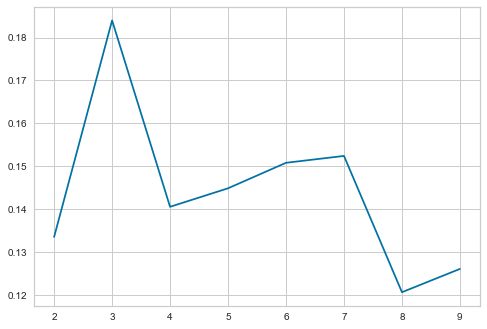

In [41]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((scaled_df1))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(scaled_df1, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

From the silhouette scores, it seems that 3 is a good value of k.

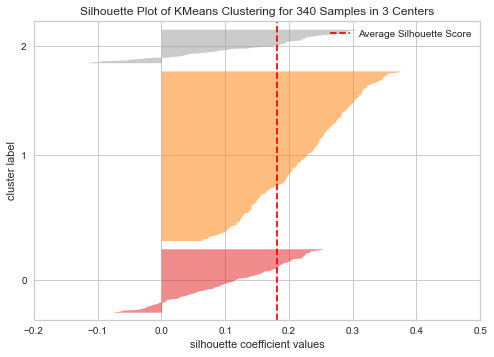

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [42]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(scaled_df1)
visualizer.show()

Let's take 3 as the appropriate no. of clusters as the silhouette score is high enough and there is knick at 3 in the elbow curve.

In [43]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_df1)

KMeans(n_clusters=3, random_state=0)

In [44]:
dataset=scaled_df1[:]  #creating a copy of the data 

In [45]:
# adding kmeans cluster labels to the dataframe
dataset["K_means_segments"] = kmeans.labels_

In [46]:
cluster_profile = dataset.groupby("K_means_segments").mean()

In [47]:
cluster_profile["count_in_each_segment"] = (
    dataset.groupby("K_means_segments")["Current_Price"].count().values)

In [48]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

Cluster 0 :
There are 82 GICS_Sector in this cluster.
Current stock price is $0.04
Ratio of the company's current stock price to the earnings per share (or P/E ratio) is-0.48.
ROE or a measure of financial performance for companies of this cluster is 0.25.

Cluster 1:
 There are 215 GICS_Sector in this cluster.
Current stock price is $0.10
Ratio of the company's current stock price to the earnings per share (or P/E ratio) is -0.06
ROE or A measure of financial performance for companies of this cluster is 0.10

Cluster 2:
There are 43 GICS_Sector in this cluster.
Current stock price is $-0.61
Ratio of the company's current stock price to the earnings per share (or P/E ratio) is 1.24
ROE or A measure of financial performance for companies of this cluster is 0.18

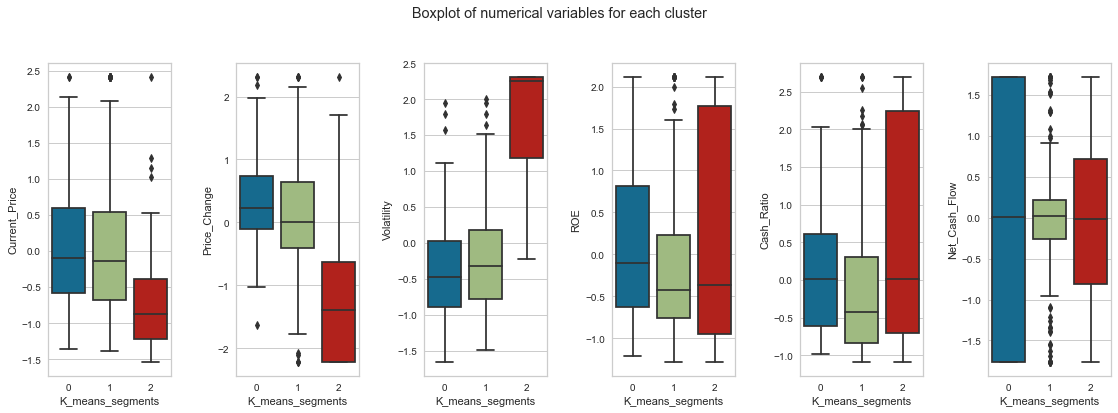

In [49]:
fig, axes = plt.subplots(1, 6, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for c in range(6):
    sns.boxplot(ax=axes[c], y=dataset[numerical_col[counter]], x=dataset["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

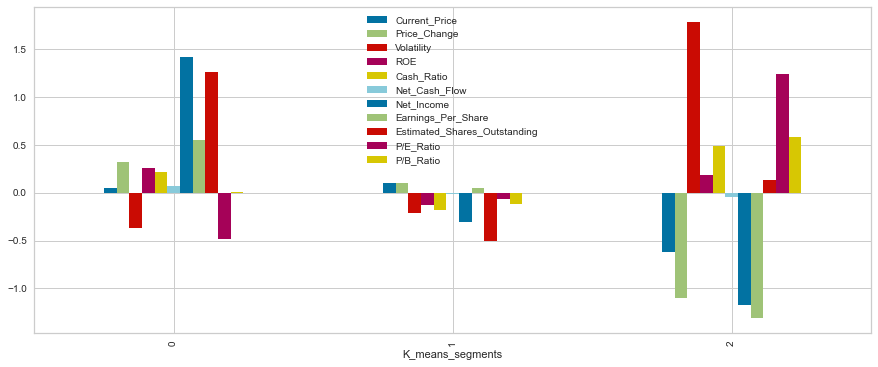

In [50]:
dataset.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6));

In [51]:
dataset['KmeansLabel']=kmeans.labels_#Adding Label to the dataset


## Hierarchical Clustering

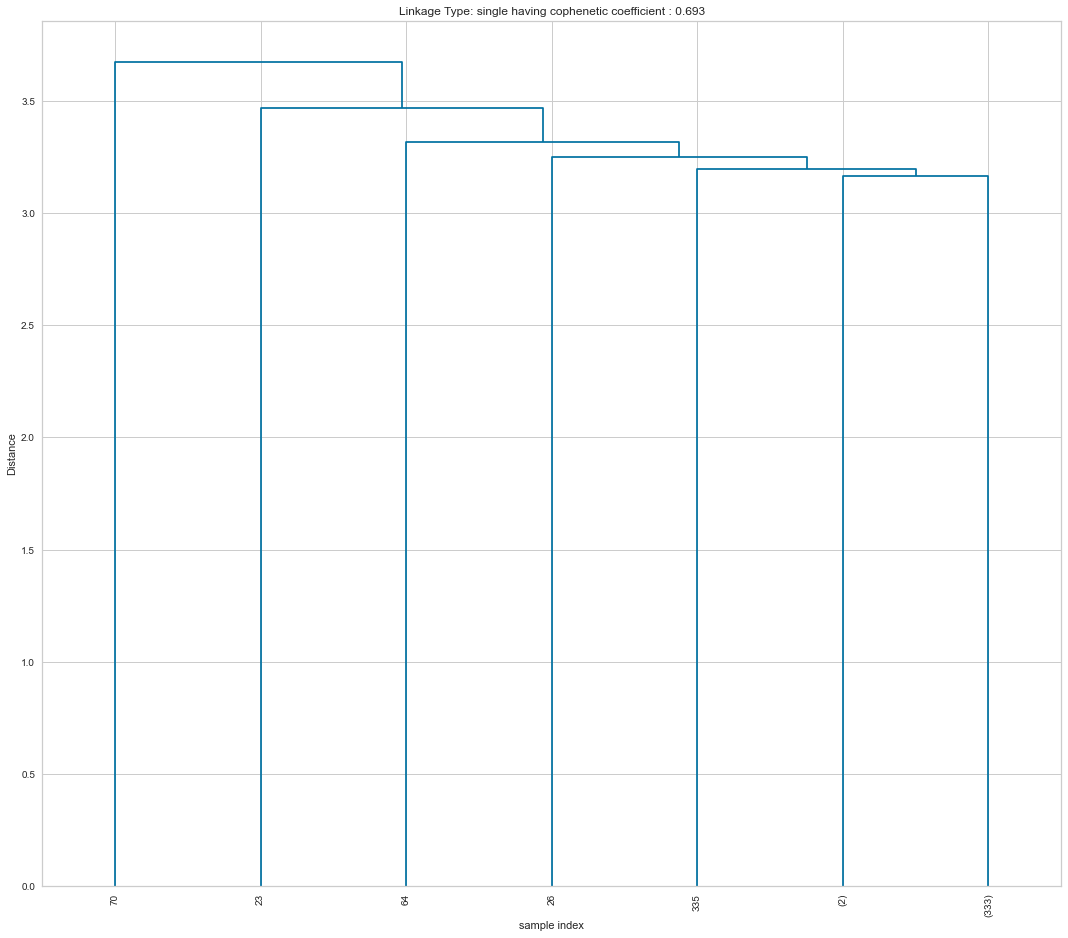

single 0.6932108674136778


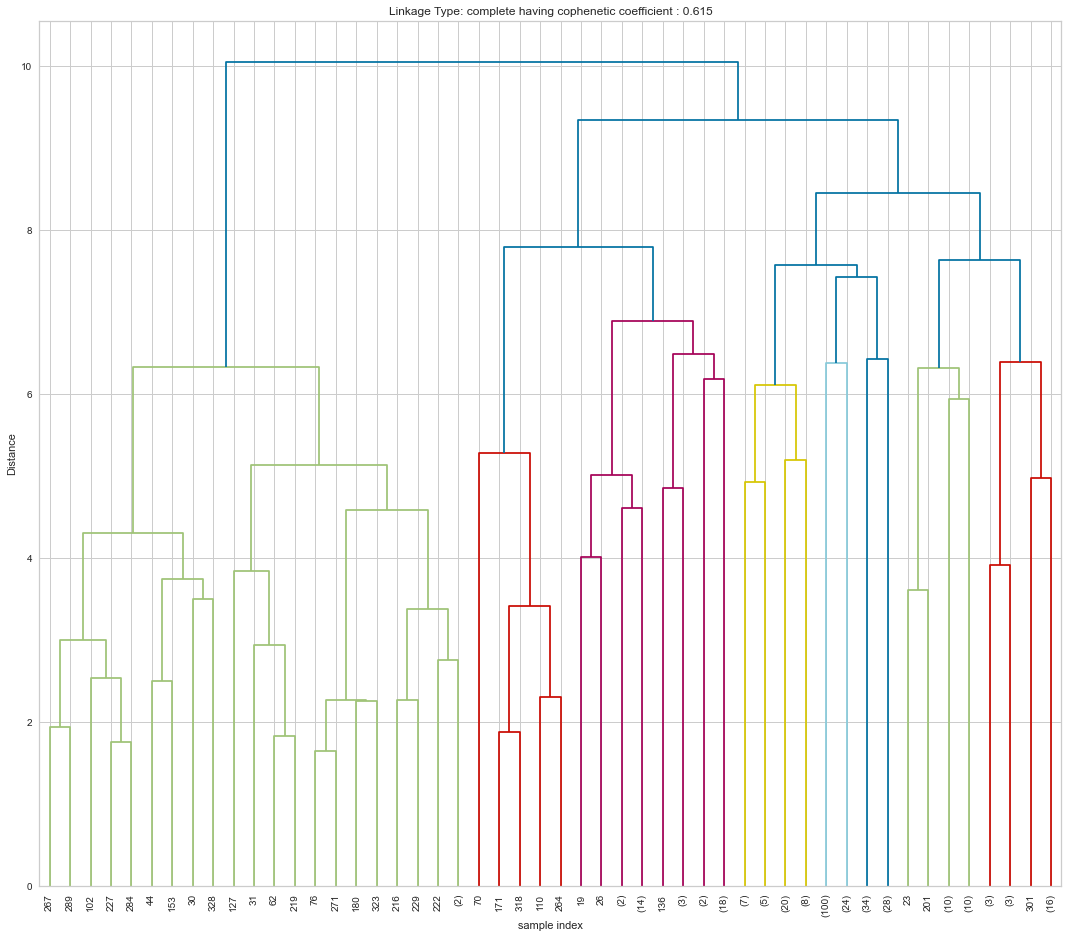

complete 0.6147798823663769


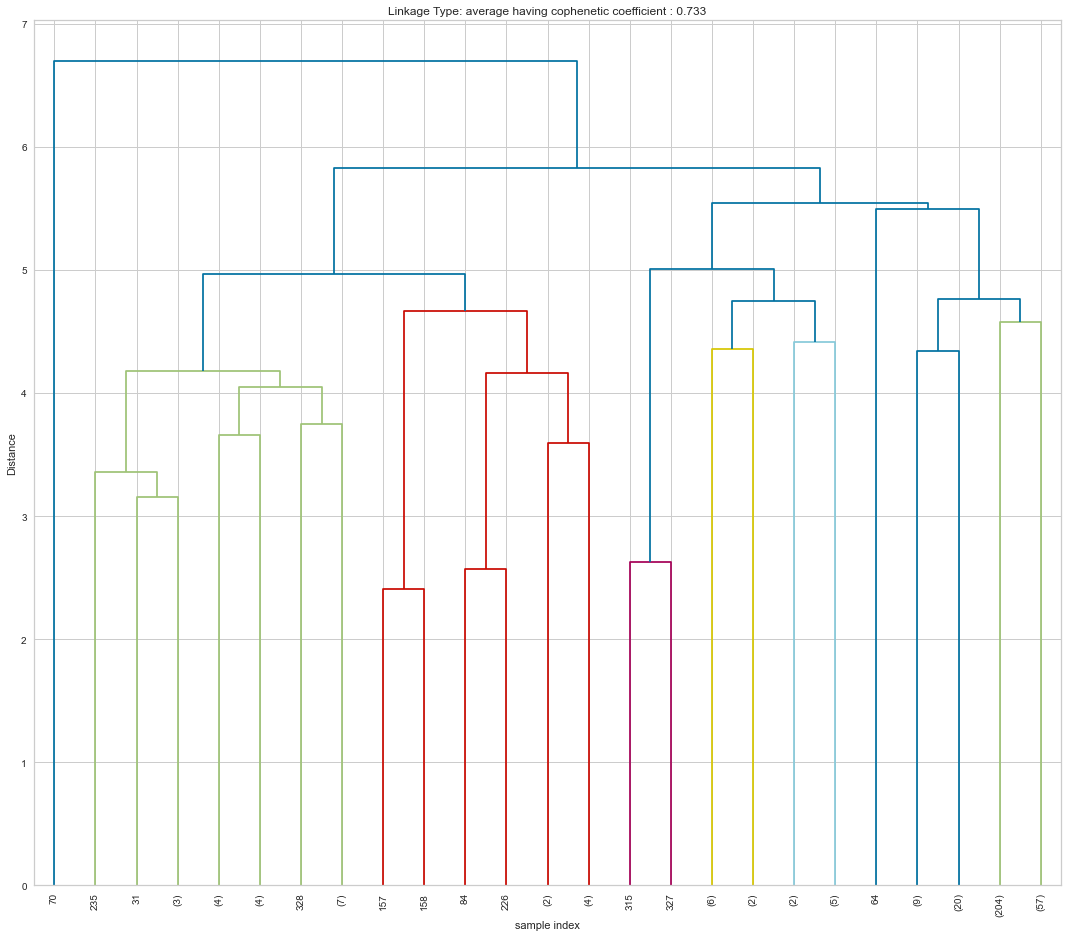

average 0.7325610568988988


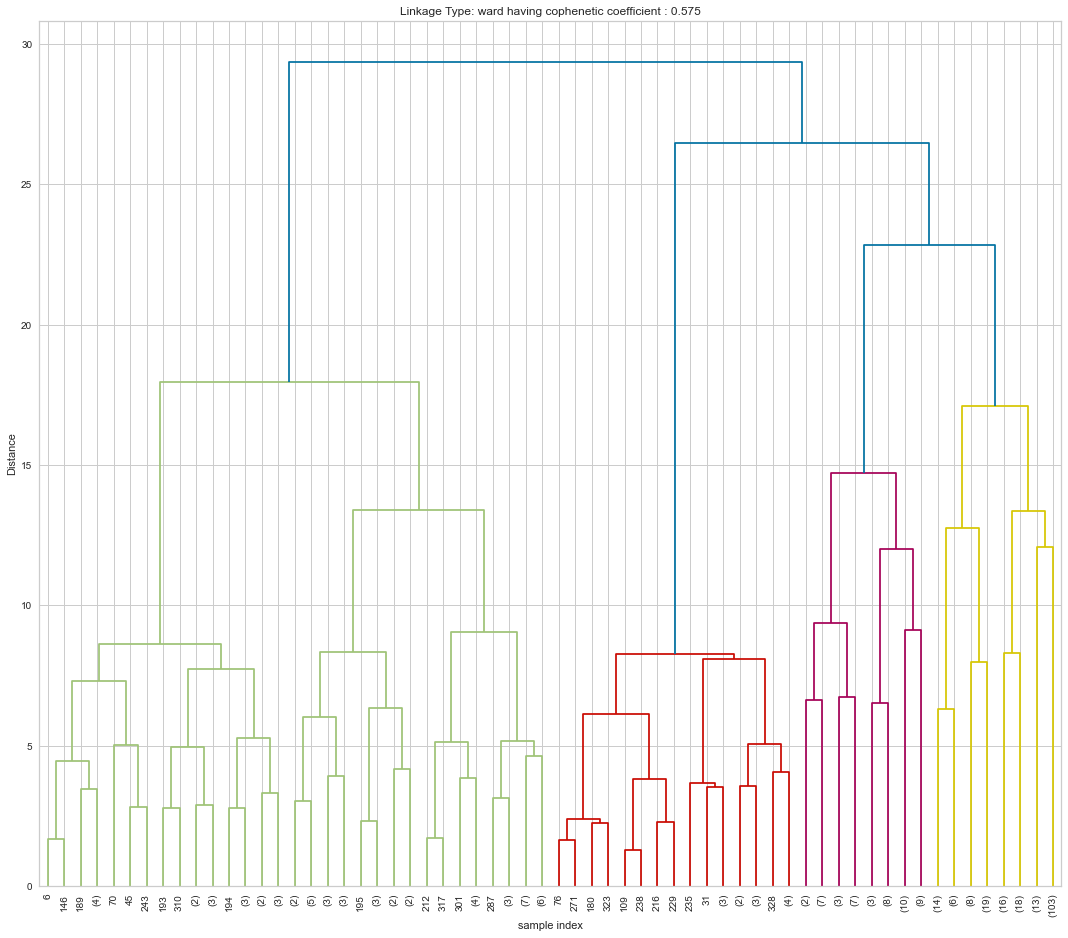

ward 0.5753306117577638


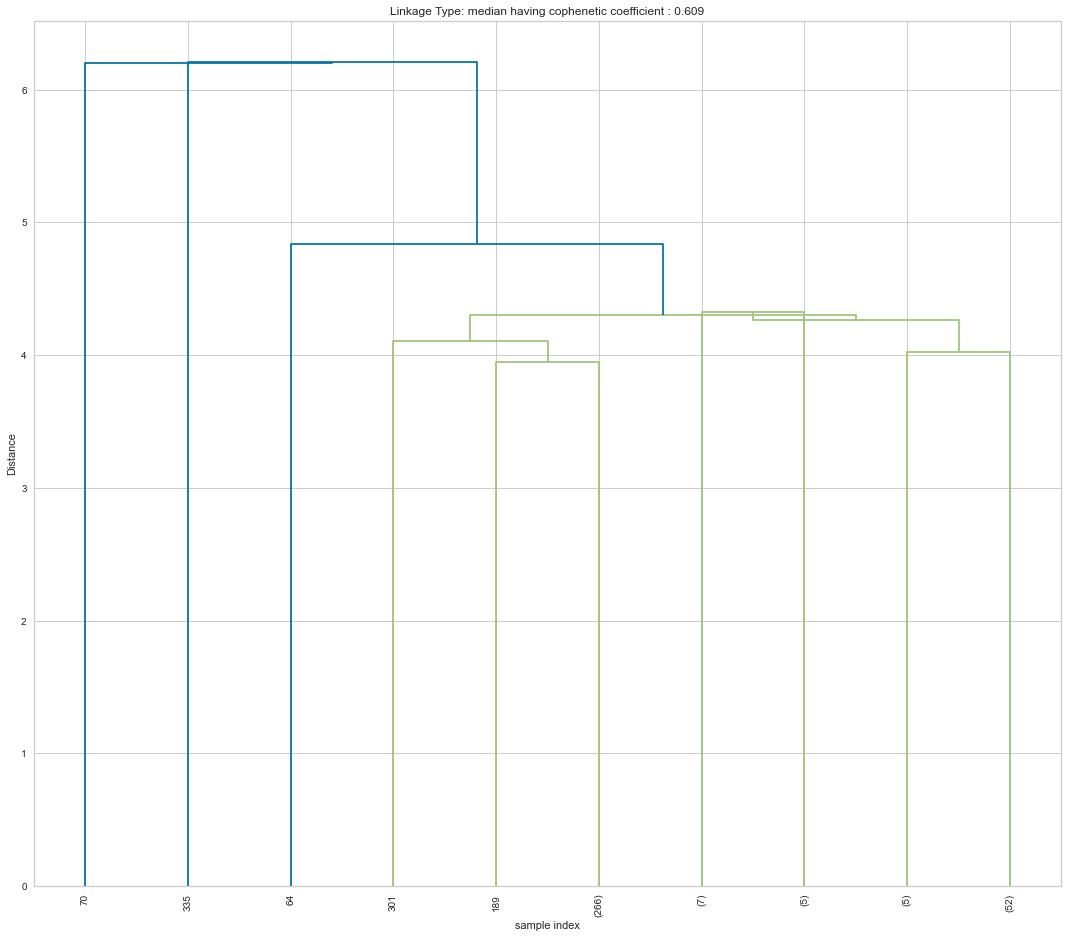

median 0.6088785958947602


In [52]:
linkage_methods=['single','complete','average','ward','median']
results_cophenetic_coef=[]
for i in linkage_methods :
    plt.figure(figsize=(15, 13))
    plt.xlabel('sample index')
    plt.ylabel('Distance')
    Z = linkage(scaled_df1, i)
    cc,cophn_dist=cophenet(Z,pdist(scaled_df1))
    dendrogram(Z,leaf_rotation=90.0,p=5,leaf_font_size=10,truncate_mode='level')
    plt.tight_layout()
    plt.title("Linkage Type: "+ i +" having cophenetic coefficient : "+str(round(cc,3)) )
    plt.show()
    results_cophenetic_coef.append((i,cc))
    print (i,cc)

In [53]:
results_cophenetic_coef_df=pd.DataFrame(results_cophenetic_coef,columns=['LinkageMethod','CopheneticCoefficient'])
results_cophenetic_coef_df

LinkageMethod  CopheneticCoefficient
0        single               0.693211
1      complete               0.614780
2       average               0.732561
3          ward               0.575331
4        median               0.608879

Looking at the best cophenetic coefficient we get is for "Average" linkage.

But looking at dendrogram 'ward' shows the good difference between clusters.

Let's make a dendrogram for the last 25 formed clusters using complete linkage to have a better view since the above dendrograms are very populated

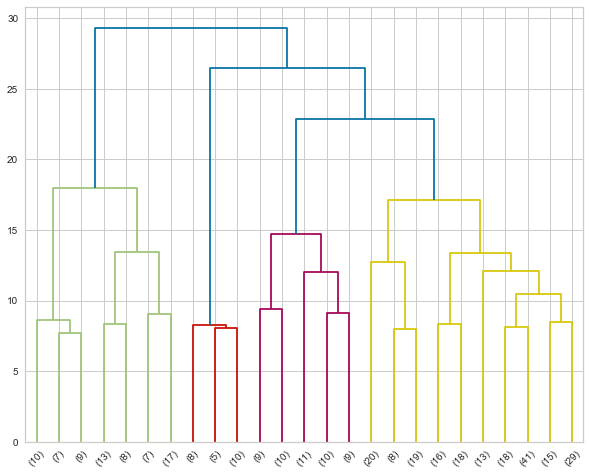

In [54]:
#use truncate_mode='lastp' to select last p formed clusters
plt.figure(figsize=(10,8))
Z = linkage(scaled_df1, 'ward', metric='euclidean')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25 
)
plt.show()

I take a maximum distance around 25 to form the different clusters as clearly visible it cuts the tallest vertical lines.

In [55]:
max_d=25
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')

In [56]:
set(clusters) 
# there are 3 clusters which are formed 

{1, 2, 3}

In [57]:
dataset2=scaled_df1[:] #Create a duplicate of the dataset

In [58]:
dataset2['HierarchicalClusteringLabel']=clusters

In [59]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
HCmodel.fit(dataset2)

AgglomerativeClustering(n_clusters=3)

In [64]:
dataset2["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling

In [65]:
cluster_profile = df.groupby("HC_Clusters").mean()

In [66]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["GICS_Sector"].count().values
)

In [67]:
# let's see the names of the countries in each cluster
for cl in df["HC_Clusters"].unique():
    print("In cluster {}, the following the specific economic sector are present:".format(cl))
    print(df[df["HC_Clusters"] == cl]["GICS_Sector"].unique())
    print()

In cluster 1, the following the specific economic sector are present:
['Industrials' 'Health Care' 'Information Technology' 'Financials'
 'Consumer Discretionary' 'Consumer Staples' 'Energy' 'Utilities'
 'Telecommunications Services' 'Materials' 'Real Estate']

In cluster 0, the following the specific economic sector are present:
['Information Technology' 'Consumer Staples' 'Utilities' 'Financials'
 'Real Estate' 'Materials' 'Industrials' 'Health Care'
 'Consumer Discretionary' 'Telecommunications Services' 'Energy']

In cluster 2, the following the specific economic sector are present:
['Energy' 'Materials' 'Information Technology']



**the clusters seem to have good variability**

In [68]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)


- **Cluster 0**
There are 246 GICS_Sector in this cluster.

Current stock price is $67.50

Ratio of the company's current stock price to the earnings per share (or P/E ratio) is 25.67.

ROE or A measure of financial performance for companies of this cluster is 17.32.

- **Cluster 1**
There are 71 GICS_Sector in this cluster.

Current stock price is $92.26 which is higher thatn the other clusters.

Ratio of the company's current stock price to the earnings per share (or P/E ratio) is 17.24

ROE or A measure of financial performance for companies of this cluster is 28.04

- **Cluster 2**
There are 23 GICS_Sector in this cluster.

Current stock price is $32.94

Ratio of the company's current stock price to the earnings per share (or P/E ratio) is 50.10

ROE or A measure of financial performance for companies of this cluster is 31.47

## K-means vs Hierarchical Clustering

### Silhouette Score

In [69]:
from sklearn.metrics import silhouette_score
silhouette_score(dataset2.drop('HierarchicalClusteringLabel',axis=1),dataset2['HierarchicalClusteringLabel'])

0.19516952045501273

In [70]:
from sklearn.metrics import silhouette_score
silhouette_score(dataset.drop('K_means_segments',axis=1),dataset['K_means_segments'])

0.2013178022396162

**Here Kmeans score is better than Hierarchical**

In [71]:
Hierarchical_results=dataset2.groupby('HierarchicalClusteringLabel').mean()
Hierarchical_results

Current_Price  Price_Change  Volatility  \
HierarchicalClusteringLabel                                            
1                                 0.509974      0.180728   -0.393536   
2                                -0.869345     -1.514341    1.998640   
3                                -0.065908      0.089423   -0.073283   

                                  ROE  Cash_Ratio  Net_Cash_Flow  Net_Income  \
HierarchicalClusteringLabel                                                    
1                            0.492359    0.071796      -0.011579    1.433056   
2                            0.717032   -0.338544      -0.315814   -1.671456   
3                           -0.209143    0.010931       0.032869   -0.257331   

                             Earnings_Per_Share  Estimated_Shares_Outstanding  \
HierarchicalClusteringLabel                                                     
1                                      0.963742                      0.892816   
2                                     -1.846851                      0.098810   
3                                     -0.105480                     -0.266921   

                             P/E_Ratio  P/B_Ratio  HC_Clusters  
HierarchicalClusteringLabel                                     
1                            -0.568635   0.043996            1  
2                             1.677575   0.251909            2  
3                             0.007272  -0.036251            0

In [72]:
Kmeans_results=dataset.groupby('K_means_segments').mean()
Kmeans_results

Current_Price  Price_Change  Volatility       ROE  \
K_means_segments                                                      
0                      0.047570      0.323258   -0.370048  0.252727   
1                      0.105167      0.096921   -0.215759 -0.132439   
2                     -0.616548     -1.101051    1.784468  0.180251   

                  Cash_Ratio  Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
K_means_segments                                                              
0                   0.213592       0.072363    1.416282            0.550664   
1                  -0.178794      -0.017814   -0.305083            0.052293   
2                   0.486658      -0.048923   -1.175402           -1.311568   

                  Estimated_Shares_Outstanding  P/E_Ratio  P/B_Ratio  \
K_means_segments                                                       
0                                     1.259448  -0.487327   0.011401   
1                                    -0.507625  -0.062404  -0.121426   
2                                     0.136388   1.241343   0.585389   

                  KmeansLabel  
K_means_segments               
0                           0  
1                           1  
2                           2

**Cluster 2 of Kmeans appears similar to Cluster 2 of Hierarchical**

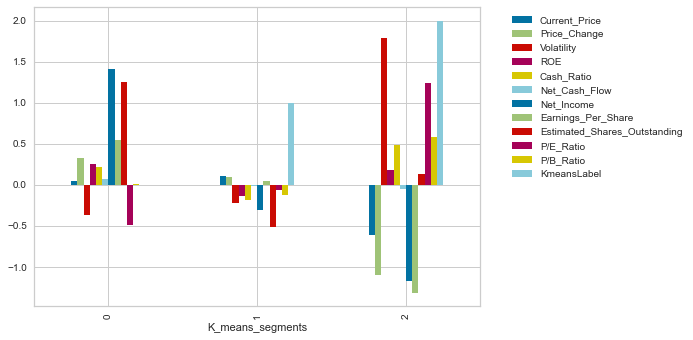

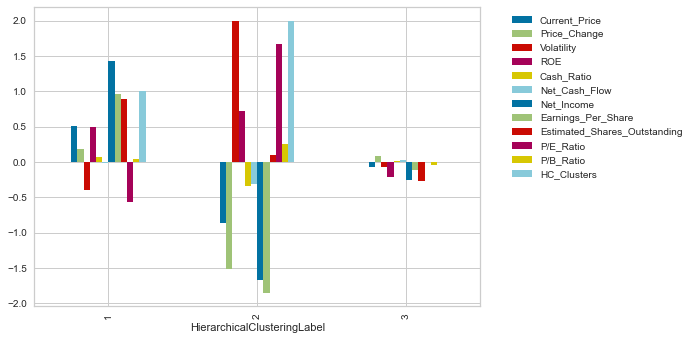

In [73]:

Kmeans_results.plot.bar()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
Hierarchical_results.plot.bar()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show();

## Actionable Insights and Recommendations

* for both clustering k-means and Hierarchical, cluster 2 have better result but, in k-means clustering ratios of (P/E Ratio, P/B Ratio, ROE and Cash Ratio) are better. this group is better for investment.

* Financial performance of cluster 3 of Hierarchical and 1 of k-means clustering is very low, These companies need to concentrate more on marketing to get up their financial performance.

* Performance of cluster 1 of Hierarchical and 0 of k-means are look like each other ratio of P/E is very low which means Ratio of the company's current stock price to the earnings per share are low. Also, cash ratio is very low in both so, these groups are not suggested
